### CS/ECE/ISyE 524 &mdash; Introduction to Optimization &mdash; Spring 2019 ###

# Optimal Profile Assignment #

#### Zeming Li, Haoyi Lu,  Xianjie Zheng
[zli653, hlu72, xzheng97]@wisc.edu

*****

### Table of Contents

1. [Introduction](#1.-Introduction)
1. [Mathematical Model](#2.-Mathematical-model)
  1. [Markowitz Mean-Variance Portfolio Theory](#2.1-Markowitz-Mean-Variance-Portfolio-Theory)
  1. [Robust Estimation improvement](#2.2-Robust-Estimation-improvement)
  1. [Penalized Optimization](#2.3-Penalized-Optimization)
1. [Solution](#3.-Solution)
  1. [Data Preprocessing](#3.0-Data-Preprocessing)
  1. [Implementation for 2.1](#3.1-Implementation-for-2.1)
  1. [Implementation for 2.2](#3.2-Implementation-for-2.2)
  1. [Implementation for 2.3](#3.3-Implementation-for-2.3)
1. [Results and Discussion](#4.-Results-and-Discussion)
  1. [Results Visualization](#4.1-Results-Visualization)
  1. [Results Explanation](#4.2-Results-Explanation)
1. [Conclusion](#5.-Conclusion)

# 1. Introduction #

Stock market is not a new thing and I am sure that you have heard this on news. Stock market is the aggregation of buyers and sellers that hold stocks. And the stock of a corporation is the shares, which is divided, into ownership of the corperation. Stock market has a very close relation with your daily life though you are not aware. Stock market also combines with the economy of a country and it affects interest rates and tax rates. <br>
<br>
In the over 100 years of the history of stock market, people try to analyze and research about the market all the time using variant methods and those methods become more advanced as the technology develops so quickly. In the beginning, investors like to use value investing which is buying stocks that seem underpriced by some fundamental analysis. Then investors created many technical indicators to analyze and predict the stock market, like candlestick pattern, moving average, relative strenth index and so on. With the improvement of the power of computers, many strategies based on computer becomes popular, like stat arbitrage, high frequency trading, trading based on machine learning and so on. <br>
<br>
![fixit flowchart][flow]
<br>
In our project, we will choose a very classical model in the stock history which is Markowitz Mean-Variance Portfolio Theory (MPT). So our first model is the traditional MPT, our second and third model will do some improvement on our basic model.<br>
<br>
In our project cover three main parts: 
1. Mathematical Model: In this part, we will explain all the mathematical theory behind each model and how we get each constraints and objective function. In our two following optimized model from traditional MPT we also include everything about how to derive the formula.
2. Solution: In this part we conclude how we do the data preprocessing and how do we solve our problems.
3. Result: In this part we do the visualization of different models and do the comparison and sensitivity analysis. In the last, we also say some limitations of our model.

[flow]: https://g.foolcdn.com/editorial/images/505490/getty-stock-market-data.jpg

# 2. Mathematical model #

## 2.1 Markowitz Mean-Variance Portfolio Theory##

Markowitz Mean- Variance Portfolio Theory, also known as **MPT**(Modern Portfolio Theory), was first introduced by Economist Harry Markowitz in a 1952 paper, which let him won a Nobel Prize in Economics later. The model aims to assemble a portfolio of assets such that the risk level is minimized while still maintaining at a certain amount of baseline return, where the risk is measured by the variance of asset prices. The key idea behind the model is that an asset's risk and return should not be determined by its own but its contribution towards the overall risk and return as the whole portfolio.
#### Assumptions####
Here we list the assumptions that MPT makes about the market and the investors.
1. investors are identical: they are risk-averse and rational
2. investors decide solely on their expected returns and risk
3. asset returns stay the same over time
4. investors have information about all the asset price that they consider for investment, and  they are allowed to update their porfolio instantly without any additional cost
5. asset price are not affected by investors' choices
6. any size of trades can be made on all asets
7. investors spend all their money into their portfolio
8. investors can take **short** positions on assets (the concept of shorts will be explained later)

#### Short (Short Selling)####
It is possible that we can manage on assets that we do not own. And this kind of action is called **short selling**. Suppose you want to **short** a stock $X$ that you do not own, then you can begin asking $X$'s stock owners to borrow some of them up to the number that they hold. This sale of these stocks is credited to your account as a debit, and denoted by the number of stocks instead of dollars. The sale of stock $X$ gives you $x_0$ dollars. Finally on one day you need to return the same amount of stock $X$ to the stock owner as originally you asked them to sell, at price of $x_1$ dollars. If $x_1 < x_0$, then you have made a profit out of this transaction; if not, you have a loss.

Short selling is a very risky but also extremely porfitable strategy.

#### Portfolio Return Rates####
If we bought an asset with $x_0$ dollars on one day and then sell it for $x_1$ dollars, then the ratio $R = {x_1 \over x_0}$ represents the **return** on the asset. And the **rate of return** is denoted as $r = {{x_1 - x_0} \over x_0} = R - 1$. <br><br>
Now consider we invest n assets at the begining with $x_0$ dollars. For each asset $i$, we assign $w_ix_0$ to it, where $w_i$ is the weighting factor to asset $i$. Since the weighting factor would sum to 1, we have the constraint
$$\sum_{i = 1}^{n} w_ix_0 = x_0 $$
Let $R_i$ represents the return on asset i, then the total return that we can gain from the portfolio is
$$ x_1 = \sum_{i = 1}^{n} R_iw_ix_0 = x_0 \sum_{i = 1}^{n}R_iw_i$$
Let $r_i$ represents the rate of return on asset i, then the rate of return of our portfolio is
$$r = R - 1 = {{x_0 \sum_{i = 1}^{n}R_iw_i} \over x_0} - 1= \sum_{i = 1}^{n}R_iw_i - \sum_{i = 1}^{n}w_i =\sum_{i = 1}^{n}(R_i-1)w_i = \sum_{i = 1}^{n} r_iw_i $$

#### Basic Model####
Let $\boldsymbol{Z} = \begin{bmatrix} r_1\\ r_2\\...\\r_n\end{bmatrix}$ to be a nx1 random vector that represents the rate of return on each asset.

Since it is impossible to get the exact rate of return for each asset, we try to estimate them with past data. 

Let $\boldsymbol{A} \in R^{N*T}$ represents the past rate of return for assets $N$ over time $T$, thus each entry $r_{i,t}$ is the rate of return for asset i in month t.

For each asset i, we denote its **expected rate of return** by 
$$\mu_i = E[r_i] =  {1 \over T} \sum_{t = 1}^{T}r_{i,t},  r_{i,t} \in \boldsymbol{A}$$
Thus $\boldsymbol{\mu} = \begin{bmatrix} \mu_1\\ \mu_2\\...\\\mu_n\end{bmatrix}$ is a nx1 vector that describes the expected rate of return for all assets. <br>
The **(true) covariances** of asset returns are denoted as $\Sigma = E[(\boldsymbol{Z}-\boldsymbol{\mu})(\boldsymbol{Z}-\boldsymbol{\mu})^T]$, but again, since $\boldsymbol{Z}$ is a random vector that we cannot measure on, we use the expected rate of return to represent it.$$\Sigma = E[(\boldsymbol{A}-\boldsymbol{\mu})(\boldsymbol{A}-\boldsymbol{\mu})^T],   r_{i,t} \in \boldsymbol{A}$$ 
Since this model is aimed to **assemble a portfolio of assets such that the risk level is minimized while still maintaining at a certain amount of baseline return**, it can be built as minimizing the weighted variace, $w^T\Sigma w$, with two constraints: the expected return should be larger than or equal to our target return, and the weights towards each asset sum to 1. If $\mu_b$ is set to be the target return for our portfolio, then the MPT model can be built as a quadratic program:
\begin{equation}
\begin{aligned}
& \underset{w}{\text{minimize}}
& & w^T\Sigma w \\
& \text{s.t.} & & m^Tw \ge \mu_b \\
& & &  e^Tw = 1 \\
\end{aligned}
\end{equation}
where $e$ is a vector of ones, restricting the sum of weighting factors to be 1.


[1] Burke, J. University of Washington, Markowitz Mean-Variance Portfolio Theory | https://sites.math.washington.edu/~burke/crs/408/fin-proj/mark1.pdf

## 2.2 Robust Estimation improvement ##

<p>In the traditional MTP, it needs two estimates variables: estimates of expected returns and estimates of covariace of those returns. The way that traditional MTP uses to estimates those two variables is using the average monthly returns of the given period of time. In formula, $\mu = \frac{1}{T}\sum\limits_{t=1}^T \mathbf{r_t}$ and $\Sigma =  \frac{1}{T}\sum\limits_{t=1}^T[\mathbf{r_t}\mathbf{r_t}^\intercal] - \mu\mu^\intercal$, where $\mathbf{r_t}$ is the vector of all assests' returns between time t and t-1. </p>
<p>    By analyzing the estimation methods, we found that they are very sensitive to $\mathbf{r_t}$, thus any extreme returns in any month (either positive or negative) would have huge impact on our estimation of the expected return. So in our second model, we want to improve the traditional MTP model by using other ways of estimation for expected returns and covariance matrix.</p>
1. How to improve $\mu$<br>
The biggest weakness of the traditional $\mu$ is sensitivity to extreme return values. Thus, instead of using mean of monthly returns $\mu = \frac{1}{T}\sum\limits_{t=1}^T \mathbf{r_t}$ to estimate expected return, we have two ways to improve our estimation.
    * We can jettison the h% extreme values and calculate the mean after discarding those values.
    * We can replace the h% extreme values by the next h% extreme values and calculate the mean.
<br>    
2. How to improve $\Sigma$ <br>
There are three disadvantages for the traditional estimation of covariance matrix: 
    1. it is very sensitive to the extreme value of $\mathbf{r_t}$, 
    2. If we want to add a new stock into our list, we need to update the stock's variance and covariance with every other stocks in out list which is very computational. 
    3. The time period of original model requires at least n months. In the contrast, if we can use some other methods like linear estimation then we can run our model with data in at least two months.

<br>
To reduce the workload of computing covariance matrix and get a more precise estimation. We will build a relationship between each stock with the market index. We will use $r_m$ to denote the market return. Then for every $r_i$, it can be expressed as $r_i = r_m + \tilde{\mathcal r_i}$ where $\tilde{\mathcal r_i}$ represents the excess return beyond the market. We assume there is a linear relationship between every stocks' excess returns and the market return, which is
$$ \tilde{\mathcal r_{i,t}} = \alpha_i + \beta_i r_{m,t} + \epsilon_{i,t} \text{ for i = 1,...,N and t = 1,...,T}$$
In this formula, we need to estimate $\alpha_i$ and $\beta_i$ for each stock thus we only need 2N variables to estimate and it is much less than the model in part 2.1. $\epsilon_{i,t}$ is error term with $\mathbf{E}[\epsilon_i] = 0$ and Cov[$\epsilon_i, \epsilon_j$]=0,$\forall j \ne i$.<br>
To solve the OLS estimates, we will use ClpSolver to get the estimates of $\alpha_i$ and $\beta_i$ for each stock i.<br>
After we get the OLS estimates for each stock, we can have two formulas for estimates stock's variance and covariance between two stocks:
$$Var[\tilde{\mathcal r_i}] = {\beta_i}^2{\sigma_m}^2 + {\sigma_{\epsilon_i}}^2$$
$$ Cov[\tilde{\mathcal r_i}, \tilde{\mathcal r_j}] = {\beta_i}{\beta_j}{\sigma_m}^2$$
where ${\sigma_m} = Var[r_m]$. Thus, by adding a bias-correction term, we can get our estimated covariance matrix, which is:
$$ \boldsymbol{\Sigma} = \boldsymbol{\beta}\boldsymbol{\beta}^\intercal {\sigma_m}^2 + \frac{T-1}{T-2}\boldsymbol{\Sigma_{\epsilon}} $$
where $\boldsymbol{\beta}$ is the length-N vector of $\beta$'s from the regression and $\boldsymbol{\Sigma_{\epsilon}}$ is the N by N diagonal matrix with regression errors.

<br><br>
[2] Martin, R Douglas, Andrew Clark and Christopher G Green. 2010. Robust portfolio construction.
In $\textit{Handbook of Portfolio Construction}$. Springer pp. 337-380. <br>
<br>
[3] Senneret, Marc, Yannick Malevergne, Patrice Abry, Gerald Perrin and Laurent Jaffres. 2016.
"Covariance versus precision matrix estimation for efficient asset allocation." $\textit{IEEE Journal
of Selected Topics in Signal Processing}$ 10(6):982-993.<br>
<br>
[4] Sharpe, William F. 1963. \A simplified model for portfolio analysis." $\textit{Management science}$
9(2):277-293.

## 2.3 Penalized Optimization##

Penalized optimization, also known as regularized optimization, intends to constrain the total norm of weights in our portfolio selection. This is acually a multivariate regression approach that we first thought about and later also found research paper saying that it performs well. Besides, it is easy to notice that $l_1-norm$ limits negative weights, or short sales in other words. This kind of limit on total shorting is reasonable and closer to actual investor behavior since this would introduce much higher risk for the portfolio.

There are many different penalty functions on weights, and each one would result in different properties in the final porfolio selection. Among all penalties, the most popular one is the $l_1-norm$, which we have covered in class, and we are expected to see sparsity in our weighting factors.

In order to apply L1 regularization, we begin by modifying our objective function in previous models.<br>
Recalling that $\Sigma = E[r_tr_t] - \boldsymbol{\mu}\boldsymbol{\mu}^T$, and the objective function $w^T\Sigma w$, we can simply rewrite the objective as $$E[(w^T\boldsymbol{\mu} - w^T\boldsymbol{A})^2]$$And since we have the constraint function $w^T\boldsymbol{\mu} \ge \boldsymbol{\mu_b}$ ($\boldsymbol{\mu_b}$ is set to be the target return). We can test on different target return and set $r_*$ be the highest target return we can get, i.e.$ w^T\mu = r_*$.
Therefore, the objective function is now $$E[(r_*-w^T\boldsymbol{A})^2]$$
Replacing the expectation with computed average from the sample data that we have collected over time, the objective function is $${1\over T} \sum_{t}^{T} (r_* - w^T\boldsymbol{A})^2$$ 

In addtion to the modified objective functinon from MPT model, we also introduce $l_1$ penalty to it: $||w||_1 = \sum_{i}^{N}|w_i|$ along with a tuning paramter $\tau$. Now we have built up our optimization problem as 
\begin{equation}
\begin{aligned}
& \underset{w}{\text{minimize}}
& & \sum_{t}^{T} (r_* - w^Tr_t)^2 + \tau||w||_1 \\
& \text{s.t.} & & m^Tw = r_* \\
& & &  e^Tw = 1 \\
\end{aligned}
\end{equation}
Here, for simplicity of our formula, the tuning parameter $\tau$ also incorporates $1\over T$ within it.

<br><br>
[5] Brodie, J., et al.(2008) Sparse and Stable Markowitz Portfolios | https://www.ecb.europa.eu/pub/pdf/scpwps/ecbwp936.pdf

# 3. Solution #

## 3.0 Data Preprocessing ##

In [1]:
# HELPER FUNCTION TO CALCULATE RATIO OF RETURN
# ratio of return in a monthly base
function get_monthly_return(csv_data)
    montly_return = Float64[]
    for i in 1:((size(csv_data))[1]-1)
        # use column 5(close price)
        # monthly return = (next month close price-this month close price)/this month close price
        append!(montly_return, (csv_data[i+1,5]-csv_data[i,5])/csv_data[i,5])
    end  
    return montly_return
end;    

In [2]:
using CSV, LinearAlgebra
# remove those files(not long enough) and get monthly return from all valid data files
data_files = readdir("top30")
total_monthly_return = zeros(215)
valid_data = zeros(216)
count = 0

for i in data_files
    file_path = string("top30/", i)
    csv_data = CSV.read(file_path) 
    csv_length = (size(csv_data))[1]
    # check all csv has the same length (no new/removed S&P 500)
    if csv_length != 216
    else 
        count += 1
        if count == 38
            valid_data = hcat(valid_data, zeros(216))        
            total_monthly_return = hcat(total_monthly_return, zeros(215))
        else 
            # for valid data, get monthly return and append into array
            valid_data = hcat(valid_data, csv_data[:,5])        
            total_monthly_return = hcat(total_monthly_return, get_monthly_return(csv_data))
        end
    end
end    

valid_data = valid_data[:, 2:end]
total_monthly_return = total_monthly_return[:, 2:end]
;

In [3]:
using Statistics

# μ calculate mean of monthly return of a stock
function get_expected_monthly_return(total_monthly_return)
    expected_monthly_return = Float64[]
    for i in 1:size(total_monthly_return)[2]
        push!(expected_monthly_return, mean(total_monthly_return[:,i]))
    end
    return expected_monthly_return
end

# Σ convolution between stocks
function get_cov_matrix(total_monthly_return, expected_monthly_return)
    return transpose(total_monthly_return)*total_monthly_return./size(total_monthly_return)[2]
    -expected_monthly_return*transpose(expected_monthly_return)
end
;

In [4]:
# risk favorite data in 15 years
risk_favorite = CSV.read("data/risk_favorite.csv")
risk_favorite_rate = mean(risk_favorite[62:180,2])/100

0.03317899159663869

In [5]:
# S&P 500 index data in 15 years and 10 years
index_data = CSV.read("data/index.csv")
index_monthly_return_15 = get_monthly_return(index_data[1:180,:])
index_monthly_return_10 = get_monthly_return(index_data[61:180,:])
;

In [6]:
# HELPER FUNCTION TO CALCULATE RATIO OF RETURN
# mean of monthly return of a stock in a monthly base
function get_monthly_return_stock(stock_data)
    montly_return = Float64[]
    for i in 1:((size(stock_data))[1]-1)
        append!(montly_return, (stock_data[i+1,1]-stock_data[i,1])/stock_data[i,1])
    end  
    return montly_return
end
;    

In [7]:
# number of timing slots and number of stock
num_time_period = size(total_monthly_return)[1]
num_stock = size(total_monthly_return)[2]

# μ mean of monthly return of a stock of all data
expected_monthly_return = get_expected_monthly_return(total_monthly_return)
;

In [8]:
# Σ convolution between stocks of all data
cov_matrix = get_cov_matrix(total_monthly_return, expected_monthly_return)
;

In [9]:
# calculate monthly return in 15 years
length_15 = 180-1
total_monthly_return_15 = total_monthly_return[1:length_15,:]
;

In [10]:
# calculate expected monthly return and covariance matrix in 15 years
expected_monthly_return_15 = get_expected_monthly_return(total_monthly_return_15)
cov_matrix_15 = get_cov_matrix(total_monthly_return_15, expected_monthly_return_15)
;

## 3.1 Implementation for 2.1 ##

In [11]:
# solve model for 2000-2015 risk-favorite based baseline profit, short allowed
baseline_profit = risk_favorite_rate
mT = transpose(expected_monthly_return_15)
cov = cov_matrix_15

using JuMP, Ipopt
m = Model(solver=IpoptSolver(print_level=0))

@variable(m, w[1:num_stock])
@constraint(m, mT*w >= baseline_profit )
@constraint(m, sum(w[i] for i in 1:num_stock) == 1)
# minimize the risk while maintain the baseline profit
@objective(m, Min, dot(w,cov*w) )

status = solve(m)
println(status) 
xsol_15rf_s = getvalue(w)
;


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

Optimal


In [12]:
# solve model for 2000-2015 equally-weighted based baseline profit, short allowed
baseline_profit = mean(expected_monthly_return_15)
mT = transpose(expected_monthly_return_15)
cov = cov_matrix_15

using JuMP, Ipopt
m = Model(solver=IpoptSolver(print_level=0))

@variable(m, w[1:num_stock])
@objective(m, Min, dot(w,cov*w) )
@constraint(m, mT*w >= baseline_profit )
@constraint(m, w[38] == 0) # this stock acts as an extreme outlier
# minimize the risk while maintain the baseline profit
@constraint(m, sum(w[i] for i in 1:num_stock) == 1)

status = solve(m)
println(status) 
xsol_15eq_s = getvalue(w)
;

Optimal


In [13]:
# solve model for 2000-2015 index-based baseline profit, short allowed
baseline_profit = mean(index_monthly_return_15)
mT = transpose(expected_monthly_return_15)
cov = cov_matrix_15

using JuMP, Ipopt
m = Model(solver=IpoptSolver(print_level=0))

@variable(m, w[1:num_stock])
@objective(m, Min, dot(w,cov*w) )
@constraint(m, mT*w >= baseline_profit )
@constraint(m, w[38] == 0) # this stock acts as an extreme outlier
# minimize the risk while maintain the baseline profit
@constraint(m, sum(w[i] for i in 1:num_stock) == 1)

status = solve(m)
println(status) 
xsol_15id_s = getvalue(w)
;

Optimal


In [14]:
# solve model for 2000-2015 risk-favorite based baseline profit, short NOT allowed
baseline_profit = risk_favorite_rate
mT = transpose(expected_monthly_return_15)
cov = cov_matrix_15

using JuMP, Ipopt
m = Model(solver=IpoptSolver(print_level=0))

@variable(m, w[1:num_stock] >= 0)
@constraint(m, mT*w >= baseline_profit )
@constraint(m, sum(w[i] for i in 1:num_stock) == 1)
# minimize the risk while maintain the baseline profit
@objective(m, Min, dot(w,cov*w) )

status = solve(m)
println(status) 
xsol_15rf_n = getvalue(w)
;

Optimal


In [15]:
# solve model for 2000-2015 index based baseline profit, short NOT allowed
baseline_profit = mean(index_monthly_return_15)
mT = transpose(expected_monthly_return_15)
cov = cov_matrix_15

using JuMP, Ipopt
m = Model(solver=IpoptSolver(print_level=0))

@variable(m, w[1:num_stock] >= 0)
@objective(m, Min, dot(w,cov*w) )
@constraint(m, mT*w >= baseline_profit )
@constraint(m, w[38] == 0) # this stock acts as an extreme outlier
# minimize the risk while maintain the baseline profit
@constraint(m, sum(w[i] for i in 1:num_stock) == 1)

status = solve(m)
println(status) 
xsol_15id_n = getvalue(w)
;

Optimal


In [16]:
# solve model for 2000-2015 equally-weighted based baseline profit, short NOT allowed
baseline_profit = mean(expected_monthly_return_15)
mT = transpose(expected_monthly_return_15)
cov = cov_matrix_15

using JuMP, Ipopt
m = Model(solver=IpoptSolver(print_level=0))

@variable(m, w[1:num_stock] >= 0)
@objective(m, Min, dot(w,cov*w) )
@constraint(m, mT*w >= baseline_profit )
@constraint(m, w[38] == 0) # this stock acts as an extreme outlier
# minimize the risk while maintain the baseline profit
@constraint(m, sum(w[i] for i in 1:num_stock) == 1)

status = solve(m)
println(status) 
xsol_15eq_n = getvalue(w)
;

Optimal


## 3.2 Implementation for 2.2 ##

In [17]:
using JuMP, Gurobi
# solve the linear regression problem
function linear_regression(r_stock, r_m)
    m = Model(solver=GurobiSolver(OutputFlag=0,BarHomogeneous=1))
    @variable(m, u[1:2])
    # using LEAST SQUARE fit r_stock = b * r_market + a
    @objective(m, Min, sum( (r_stock - (r_m*u[2]+u[1])).^2 ) )
    status = solve(m)
    uopt = getvalue(u)
    return uopt
end

linear_regression (generic function with 1 method)

In [18]:
# variance for index monthly return
var_index = var(index_monthly_return_15, corrected=false)
b_vec = Float64[]
expected_monthly_return_removed = Float64[]
var_err_stock = Float64[]
mean_err_stock = Float64[]
for stock in 1:num_stock
    # remove 9(5%) extreme values of each stock
    monthly_return_stock = total_monthly_return[1:length_15,stock]
    # calculate the square of the distance between this month return and mean
    # sort and remove highest distance from mean
    mean_15 = mean(monthly_return_stock)
    distance_15 = [(i-mean_15)^2 for i in monthly_return_stock]
    remove_h = sort(distance_15, rev=true)[1:9]
    remove_h_index_all = [findfirst(x -> x== i, distance_15) for i in remove_h]
    remove_h_index = collect(Iterators.flatten(remove_h_index_all))
    new_monthly_return_stock = Float64[]
    new_index_monthly_return = Float64[]
    # remove corresponding data from both monthly return of stock and index monthly return
    for i in 1:length_15
        if !(i in remove_h_index)
            append!(new_monthly_return_stock, monthly_return_stock[i])
            append!(new_index_monthly_return, index_monthly_return_15[i])
        end
    end
    append!(expected_monthly_return_removed, mean(new_monthly_return_stock))
    # calculate the linear regression
    a = linear_regression(new_monthly_return_stock, new_index_monthly_return)
    append!(b_vec, a[2])
    # calculate the error term of the linear regreesion of the stock and market
    err = new_monthly_return_stock - (new_index_monthly_return.*a[2].+a[1])
    # mean and variance of the error term
    append!(var_err_stock, var(err))
    append!(mean_err_stock, mean(err))
end
;

Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic license - for non-commercial use only
Academic lice

In [19]:
# calculate the covariance between two stocks
cov_stock = transpose(zeros(num_stock))
for i in 1:num_stock
    cov_stock = vcat(cov_stock, transpose([b_vec[i]*b_vec[j]*var_index for j in 1:num_stock]))
end

cov_stock = cov_stock[2:end, :]
;

In [20]:
# adding a bias-correction term
cov_stock = cov_stock .+ (length_15-1)/(length_15-2).*Diagonal(mean_err_stock)
;

In [21]:
# 2000-2015 risk favorite remove 5% extreme values using index baseline profit
baseline_profit = mean(index_monthly_return_15)
# baseline_profit = sum(expected_monthly_return_15)/length_15
mT = transpose(expected_monthly_return_removed)
cov = cov_stock

using JuMP, Ipopt
m = Model(solver=IpoptSolver(print_level=0))

@variable(m, w[1:num_stock])
@objective(m, Min, dot(w,cov*w) )
@constraint(m, w[38] == 0)
@constraint(m, mT*w >= baseline_profit )
# minimize the risk while maintain the baseline profit
@constraint(m, sum(w[i] for i in 1:num_stock) == 1)

status = solve(m)
println(status) 
xsol_rb = getvalue(w)
;

Optimal


## 3.3 Implementation for 2.3 ##

In [22]:
# 2000-2015 index baseline profit as target profit
#target_profit = mean(index_monthly_return_15)
target_profit = max(risk_favorite_rate,mean(expected_monthly_return_15),mean(index_monthly_return_15))
mT = transpose(expected_monthly_return_15)
cov = cov_matrix_15
# regularization factor
tune_factor = 120

using JuMP, Gurobi, Ipopt
m = Model(solver=IpoptSolver(print_level=0))

@variable(m, w[1:num_stock])
# t as the absolute value of w
@variable(m, t[1:num_stock])
@constraint(m,  w .<= t)
@constraint(m, -w .<= t)
@constraint(m,  t .<= 1)
@constraint(m,w[38] == 0)
@constraint(m, mT*w == target_profit )
@constraint(m, sum(w[i] for i in 1:num_stock) == 1)
# introduce L1 regularization
@objective(m, Min, sum([target_profit - (transpose(total_monthly_return_15[t,:])*w)^2 for t in 1:length_15]) + tune_factor*sum(t) )

status = solve(m)
println(status) 
xsol_l1 = getvalue(w)
;

Optimal


# 4. Results and Discussion #

Throughout our study, we constructed three different mathematical models in order to optimize our portfolio selection. In the traditional MPT model, the first three models that we constructed use data from 2000.01.01~2014.12.01 with three different baselines, which are **risk-favorite return** (Some investors are risk-alike and they prefer higher return and higher ), **index return** (we choose sp-500 index return) and **equal-weighted return** (we assign each stock with weight= $\frac{1}{number of stocks}$ to see how much return we can get). We also allow short selling (see definition of short in 2.1) in these three models. In the remaining three models, we use data from 2005.01.01~2014.12.01 with same three baselines in our first three models. But this time, we do not allow short selling. In each model, we use our data to compute $\mu$ and $\Sigma$, respectively. Then we will use each model's $\mu$ and $\Sigma$ and compute the weight of each stock, accordingly. To test our model, we use data from 2015.01.01~2017.12.01 as test data. Then we apply our stock allocation strategy on these recent three years to see how do they perform.<br>
<br>
For each model, we choose three graphs to show its proporties. First graph is **weight graph** which is a bar chart representing the weights that we selected for each stock. Second graph is **monthly return comparing with SP-500 graph** which we compare monthly return of our stock allocation and SP-500 from 2015.01.01~2017.12.01. Our third graph is **accumulating return graph** which we track how does our strategy perform throughout three years with respect of months. At last, we show the risk comparison of different portofolios built from models that we have constructed.<br>

## 4.1 Results Visualization ##

In [23]:
function getTestValue(weight)
    test_monthly_return = Float64[]
    # replace low-percentage (percentage < 0.1%) stock by 0
    for i in 1:num_stock
        if abs(weight[i]) < 0.001
            weight[i] = 0
        end
    end
    # process test data
    test_sample = total_monthly_return[182:215, :]
    # final portfolio selection
    final_result = test_sample * weight

    final_tracking = Float64[]
    final_return = 1
    # track on monthly return
    for i in final_result
        push!(final_tracking,final_return)
        final_return *= i+1
    end
    # variance of each portfolio
    final_variance = var(final_result, corrected = false)
    
    return final_result,final_tracking, final_variance
end

getTestValue (generic function with 1 method)

In [24]:
file_path = "data/^GSPC.csv"
sp500_data = CSV.read(file_path)
sp500_monthly_return = get_monthly_return(sp500_data)
sp500_compare_data = sp500_monthly_return[182:215]
;

In [25]:
function threePlots(solution, final_result, final_tracking)
    # plot the weighting bar graph
    x = range(1,stop = 129)
    fig = figure("pyplot_barplot",figsize=(12,8))
    subplot(311)
    bar(x,solution,color="#0f87bf",align="center",alpha=0.4)
    xlabel("stock number")
    ylabel("weight")
    # plot each portfolio's monthly return, compared with benchmark (S&P500)
    figure(figsize=(12,8))
    subplot(312)
    plot([sp500_compare_data final_result],".-");
    legend(["sp-500", "our portfolio"], loc="lower right")
    ylim(-0.2, 0.2)
    xlabel("month from 2015.1 to 2017.12")
    ylabel("monthly return%")
    # plot the performance of each portfolio
    x = range(1,stop = 34)
    figure(figsize=(12,8))
    subplot(313)
    plot(x, final_tracking,".-");
    legend(["our portfolio tracking"], loc="lower right")
    xlabel("month from 2015.1 to 2017.12")
    ylabel("accumulative return%")
end

threePlots (generic function with 1 method)

## 4.1.1 MPT Model##

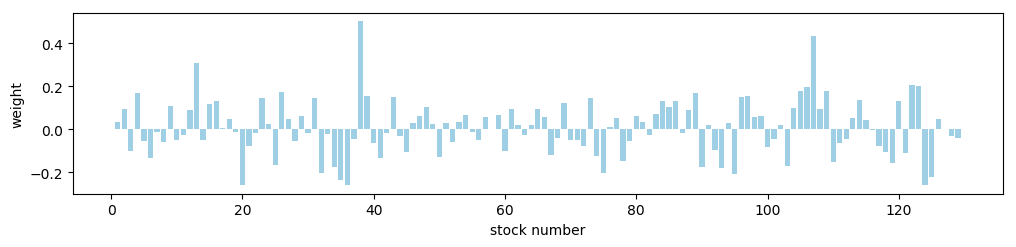

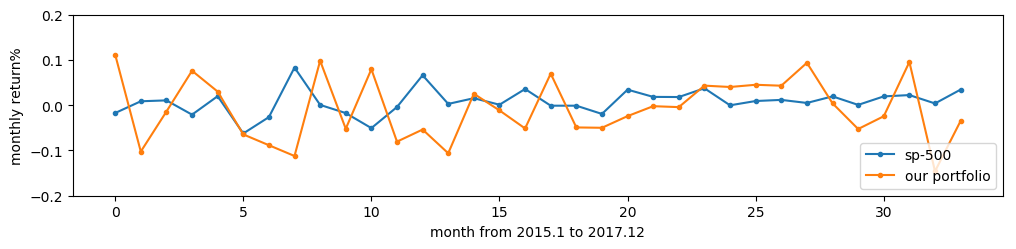

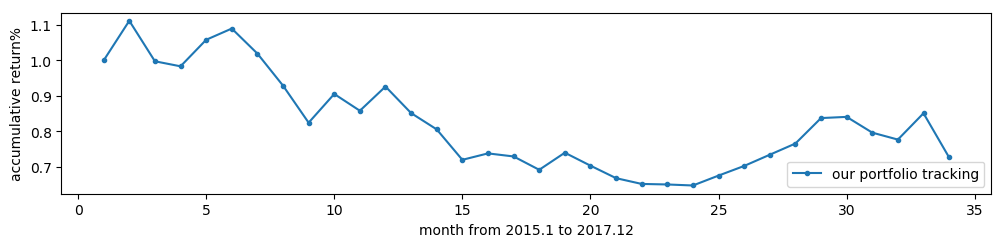

In [40]:
using PyPlot
fr_15rf_s, ft_15rf_s, fv_15rf_s = getTestValue(xsol_15rf_s);
threePlots(xsol_15rf_s, fr_15rf_s, ft_15rf_s);

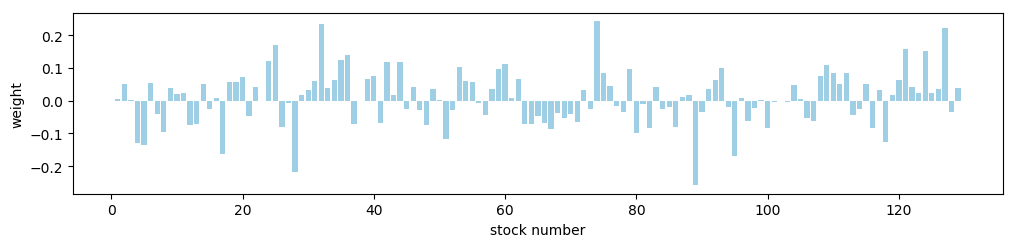

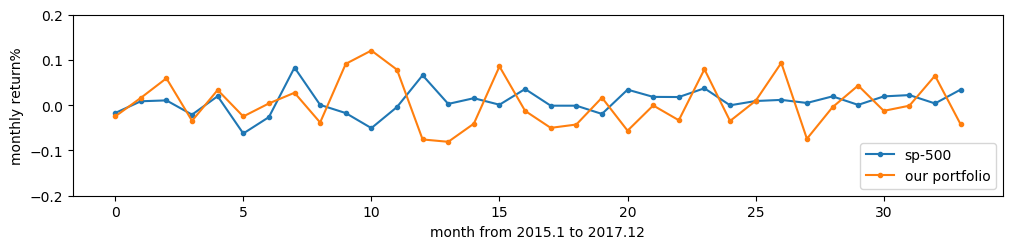

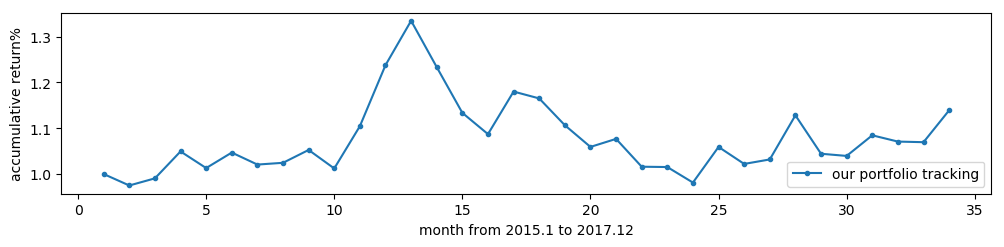

In [27]:
fr_15id_s, ft_15id_s, fv_15id_s = getTestValue(xsol_15id_s);
threePlots(xsol_15id_s, fr_15id_s, ft_15id_s);

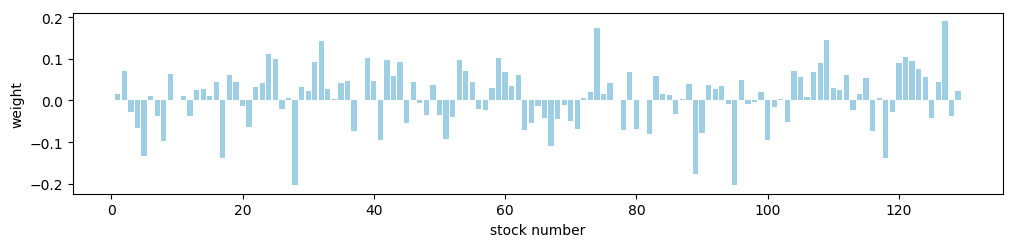

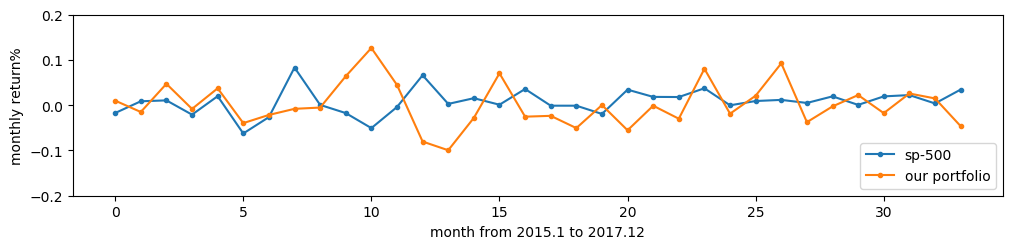

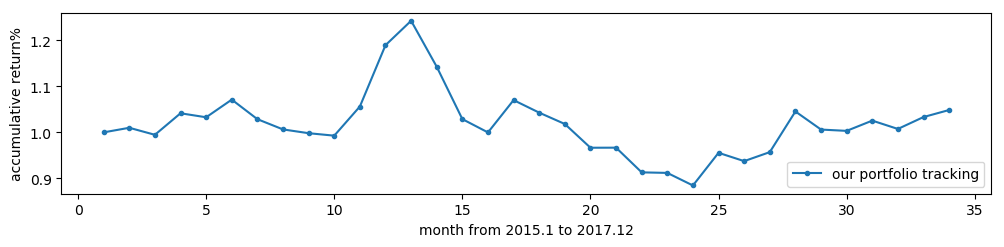

In [28]:
fr_15eq_s, ft_15eq_s, fv_15eq_s = getTestValue(xsol_15eq_s);
threePlots(xsol_15eq_s, fr_15eq_s, ft_15eq_s);

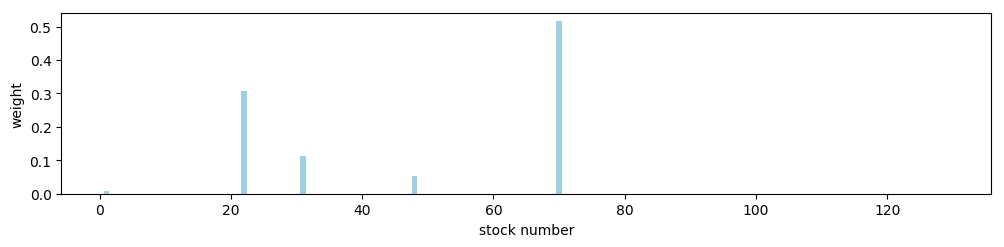

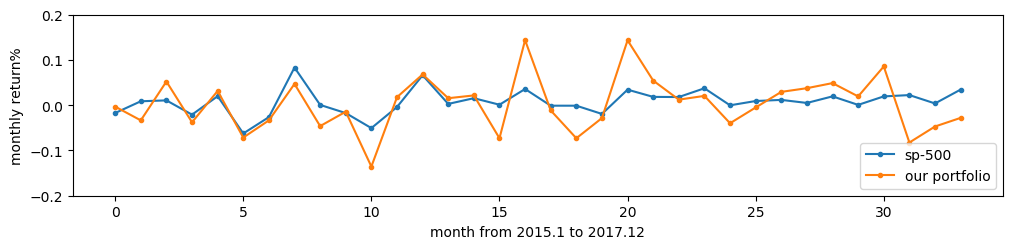

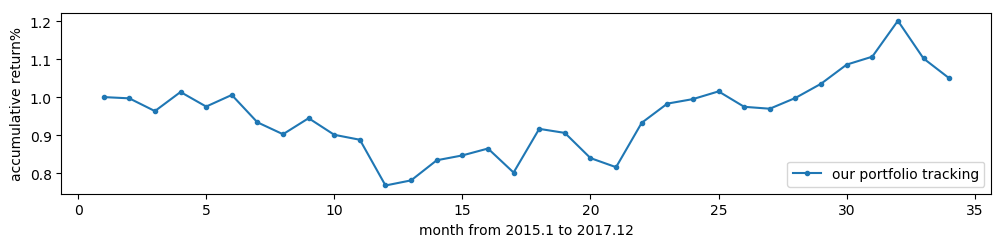

In [29]:
fr_15rf_n, ft_15rf_n, fv_15rf_n = getTestValue(xsol_15rf_n);
threePlots(xsol_15rf_n, fr_15rf_n, ft_15rf_n);

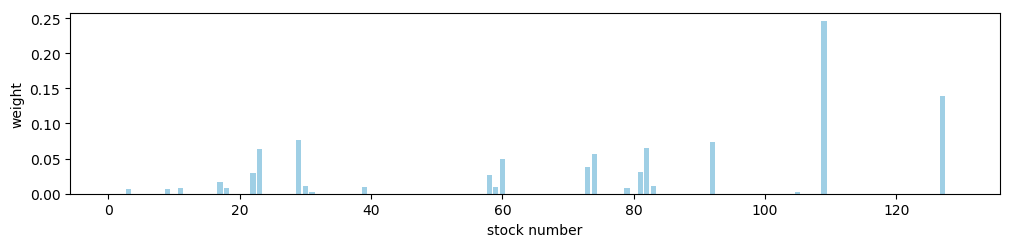

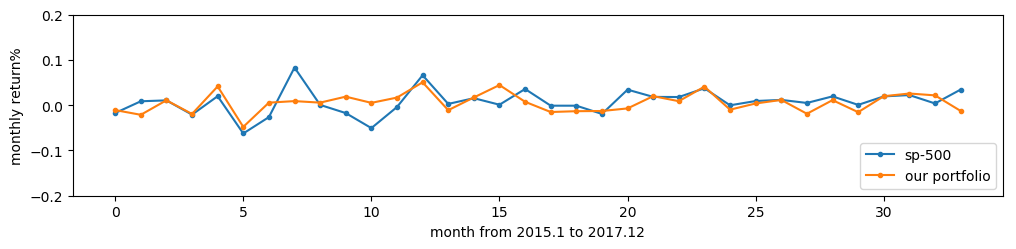

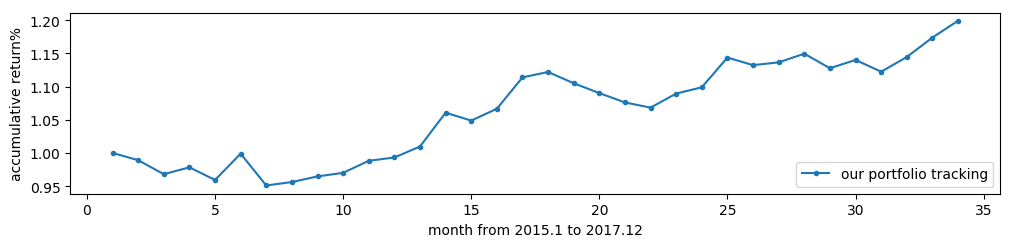

In [30]:
fr_15id_n, ft_15id_n, fv_15id_n = getTestValue(xsol_15id_n);
threePlots(xsol_15id_n, fr_15id_n, ft_15id_n);

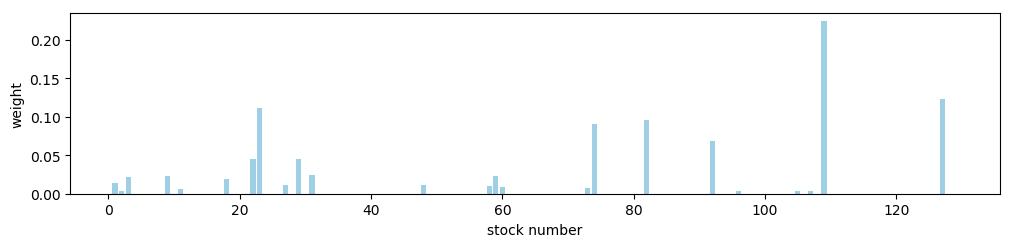

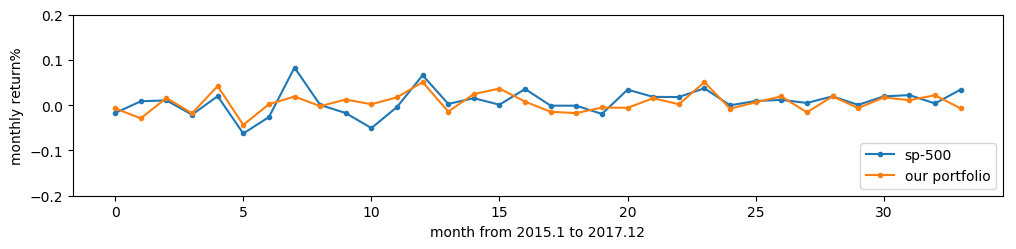

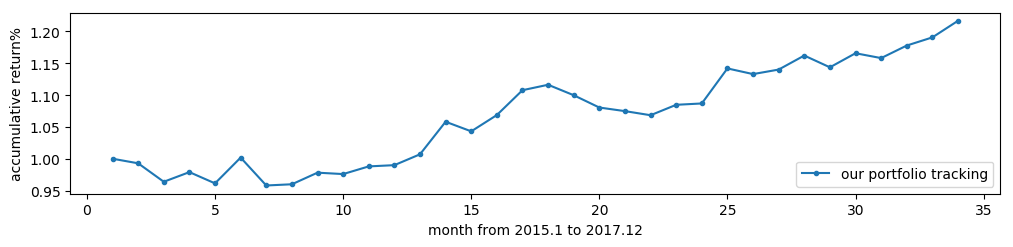

In [31]:
fr_15eq_n, ft_15eq_n, fv_15eq_n = getTestValue(xsol_15eq_n);
threePlots(xsol_15eq_n, fr_15eq_n, ft_15eq_n);

## 4.1.2 Robust Optimization ##

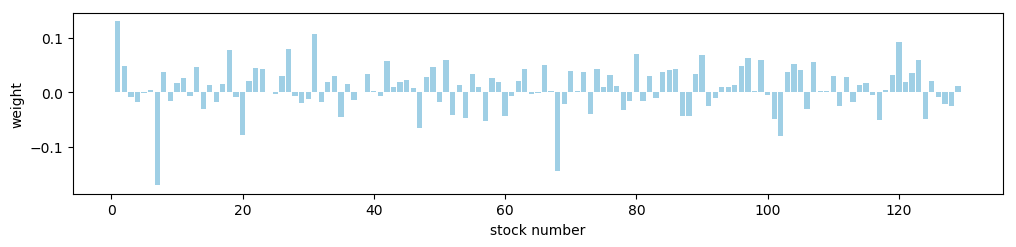

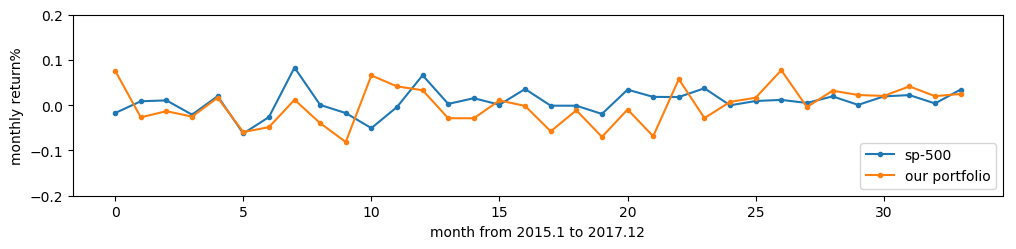

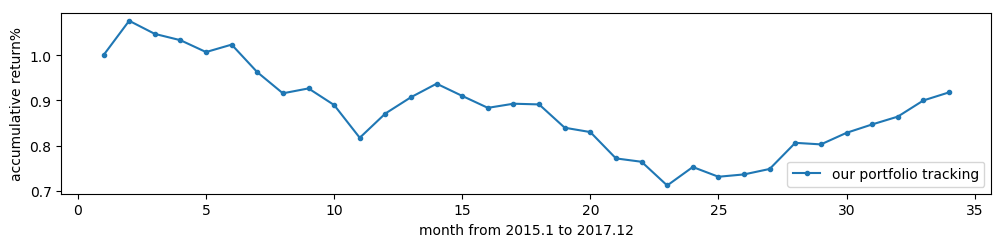

In [32]:
fr_rb, ft_rb, fv_rb = getTestValue(xsol_rb);
threePlots(xsol_rb, fr_rb, ft_rb);

## 4.1.3 Penalized Optimization##

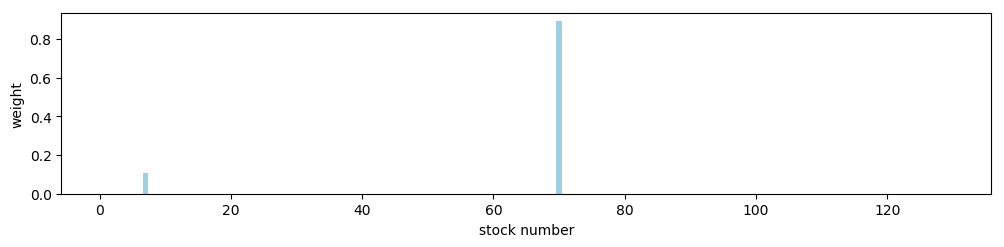

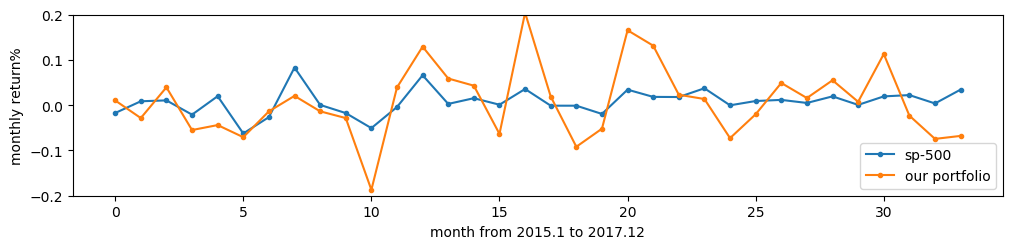

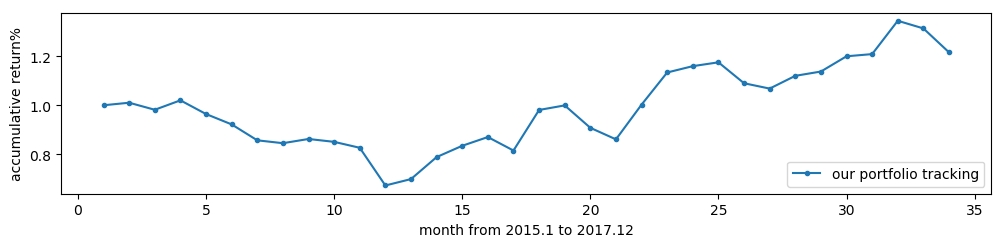

In [33]:
fr_l1, ft_l1, fv_l1 = getTestValue(xsol_l1);
threePlots(xsol_l1, fr_l1, ft_l1);

In [34]:
for i in 1:num_stock
    if abs(xsol_l1[i]) > 0.01
        println(i)
        println(xsol_l1[i])
    end
end

7
0.10780296037138007
70
0.8921969606394188


## 4.2 Results Explanation##

Analyzing stock market would be meaningless if we do not use real data. Thus in our project, we train our model using real data to get the stock allocation weight that satisfies our constraints. Because our solvers all get the optimal result, so if we still analyze the result based on the time we used to train, it would be trivial because it must perform really excellent. So we decide to use another three years (2015.01.01~2017.12.01) to test how do our models perform. Stock market changes very soon and it is very unpredictable. So some of our models' results maybe not very good in the test dataset but we can still discover many things from it and improve them. Also, people in stock markets are looking for profit so we will also put return in our analyzing object as well as risk.


## 4.2.1 Baselines ##

In our six models in traditional MPT part, we only change their baselines. By comparing their profitability and risk, we conclude that setting equal-weighted return as baseline would be better than the other two. 
If we compare risk variance, we can find that equal-weighted return has the lowest risk which also satisfies our goal of objective function. From the table below, we can find that equal-weighted return performs better than the other two models in both shorting or banning shorting models.

|                       | With Short | Without Short |
|-----------------------|------------|---------------|
| Risk-Favorite return  | 0.004600   | 0.003553      |
| Index return          | 0.002889   | 0.000451      |
| Equal-Weighted return | 0.002322   | 0.000444      |

$$\text{Table 4.2.1.1: risk variance comparison}$$

Considering about profitability, Although equal-weighted return is not better than index return,  but it still has positive return on both groups, which is really valuable because stock market changes very soon and if it can have positive return over three years, it means that our stock allocation is good.

|                       | With Short | Without Short |
|-----------------------|------------|---------------|
| Risk-Favorite return  | 0.726922   | 1.049717      |
| Index return          | 1.139058   | 1.199227      |
| Equal-Weighted return | 1.048557   | 1.216737      |

$$\text{Table 4.2.1.2: profitability comparison}$$

Base on the result of risk variance comparison and profitability comparison, we conclude that equal-weighted return is the best baseline to use. Index return is also very close to equal weighted return. Now I will analyze the reason of why risk-favorite return baseline performs not really good. The reason for risk-favorite return is that it sets the baseline too high. We found our equal-weighted return only set monthly return baseline to 0.1 percent while the risk-favorite return sets the baseline to 3%. Such a high baseline constraint makes our optimization model to choose some highly return stocks in those years thus if we use new data to test our result, they performs not good because those stocks highly return stocks are not very stable. We can also find this point by the variance table. In other words, setting baseline too high would cause overfitting.<br>


## 4.2.2 Shorting ##

In our traditional MPT, we also compare how do they perform with or without shorting constraint (See Table 4.2.1.1 and Table 4.2.1.2). And we find that forbidding shorting can have big improvement if baseline is same.<br>
<br>
Ban shorting has three advantages:
1. Investors do not need to monitor too many stocks: We found that allowing shorting would cause investors hold positions in almost all the stocks. It is very inefficient because they need to pay too much transaction fee on each position and they also need to monitor all the stocks they hold. In the contrast, banning shorting will let investors to at most 20 stocks.
2. shorting is not a good strategy in the long run: Because we choose stocks from the list SP-500 which contains the 500 highest-asset companies thus they are all good companies. Shorting would only be profitable if the price of a company is decreasing. But if the time is three years, companies in SP-500 usually would not allow their price decreasing all the time. So shorting those companies in the long run is not a good choice.
3. Shorting adding the risk: Shorting has the same effect as leverage because investors have more money to invest. Thus if the position they hold have some loss, the leverage will magnify their loss. That is why shorting has some bad result.

## 4.2.3 The way we estimate the expected return and covariance matrix ##

In model 2.2, we improve the way we estimate the estimated return and covariance matrix. After testing 6 models in traditional MPT, we find that using index return as baseline is a better choice. Thus in 3.2, we choose index return as the baseline. In this part, I will compare traditional MPT and single-index improvement MPT with same dataset and baseline.

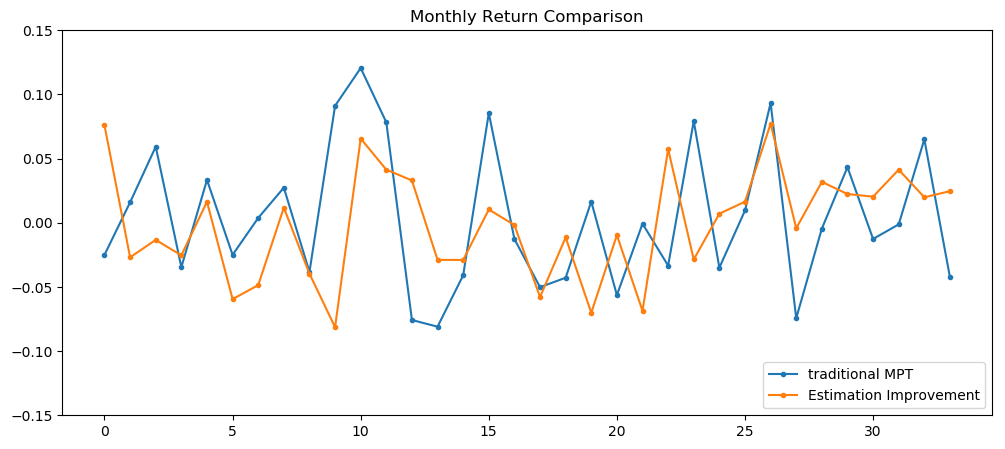

In [47]:
figure(figsize=(12,5))
plot([fr_15id_s fr_rb],".-");
legend(["traditional MPT", "Estimation Improvement"], loc="lower right")
ylim(-0.15,0.15)
title("Monthly Return Comparison")
;

| Model                                   | Risk Variance |
|-----------------------------------------|---------------|
| MPT with Risk-Favorite Baseline         | 0.004600      |
| MPT with Index Return Baseline          | 0.002889      |
| MPT with Equal-Weighted Return Baseline | 0.002322      |
| **Estimation Improvement Model**        | **0.001732**  |
| Penalized Optimization Model            | 0.006126      |

We can see that estimation improvement model has the lowest risk variance.

## 4.2.4 Effect of L1 Regularization ##

Adding L1 regularization has two improvements. <br>
First one is that it sparses the weights. In other words, it decreases the stock number in the allocation. Second, it has a better total return comparing with two other models.

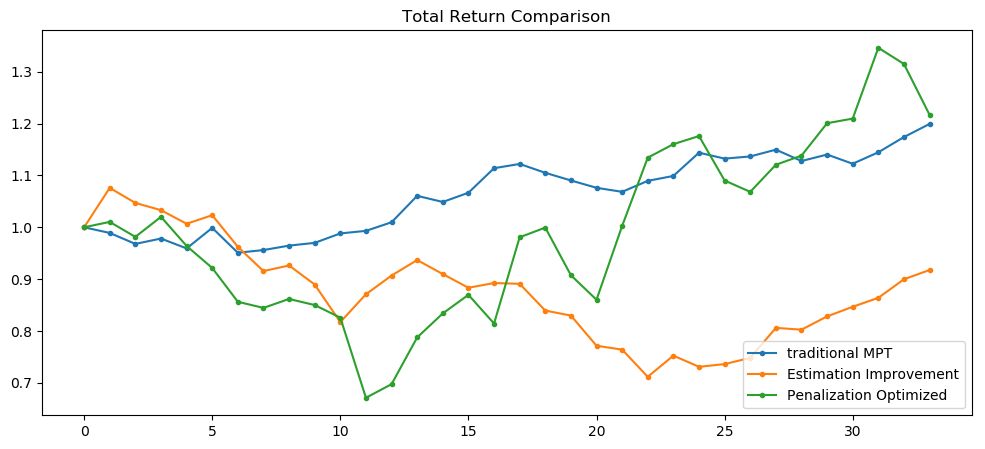

In [48]:
figure(figsize=(12,5))
plot([ft_15id_n ft_rb ft_l1],".-");
legend(["traditional MPT", "Estimation Improvement", "Penalization Optimized"], loc="lower right")
title("Total Return Comparison")
;

## 4.3 Limitations ##

There are several limitations that we considered in our study, one is that the data we utilized may induce overfitting even though we have collected a long period of data and used them to train our model. Therefore, in test sample from 2015.1 to 2017.12, the portfolio may not perform as good as it does in the training set since it still inolves some traits from the training data we used like the significant financial crisis in 2008.This issue is very hard to address due to the instability property of financial market. 

The other limitation is that the portfolio we try to optimize will keep still for three years, it does not allow dynamically changing decisions of portfolio selection, which hinders some good properties of the impoved models, especially the second one, robust optimization.

# 5. Conclusion #